<a id='topo'></a>
## ANÁLISE DE SOBREVIVÊNCIA
### Teoria e aplicações em saúde
#### Capítulo 2: O tempo na análise de sobrevivência
#### Exercícios Resolvidos
###### **Autor: Carlos Ed Beluzo - cbeluzo@gmail.com**

## Tópicos:

* [Importação de bibliotecas e leitura do arquivco CSV](#import)

* Funções:
    * [survival_time_plot](#survival_time_plot)
    * [individual_trajectory_plot](#individual_trajectory_plot)
    * [surv](#surv)


* Exercícios
    * [Exercício 2.1](#Exercicio2.1)
    * [Exercício 2.2](#Exercicio2.2)
    * [Exercício 2.3](#Exercicio2.3)
    * [Exercício 2.4](#Exercicio2.4)
    * [Exercício 2.5](#Exercicio2.5)
    * [Exercício 2.6](#Exercicio2.6)
    * [Exercício 2.7](#Exercicio2.7)
    * [Exercício 2.8](#Exercicio2.8)


**Importação de bibliotecas e leitura do arquivco CSV** <a id='imports'></a>

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


**Function:** survival_time_plot  <a id='survival_time_plot'></a>

In [108]:
# Fuction to generate survival time of a group of individuals
from lifelines.plotting import plot_lifetimes

def survival_time_plot(p_entry_individual, p_actual_lifetimes, p_current_time, p_censured, p_time_unit, p_person_type, p_title, p_width, p_height):
    observed_lifetimes = np.minimum(p_actual_lifetimes, p_current_time)
    death_observed = p_actual_lifetimes < p_current_time

    fig = plt.figure(figsize=(p_width,p_height))
    
    ax = plot_lifetimes(durations = observed_lifetimes,
                        event_observed = death_observed,
                        entry = p_entry_individual,
                        left_truncated = True,
                        sort_by_duration = False,
                        event_observed_color = "black",
                        event_censored_color = "r",
                       )

    total_individuals = len(p_actual_lifetimes)
    total_period = max(p_actual_lifetimes+p_entry_individual)
    
    ax.vlines(p_current_time, 0, total_individuals, lw=1, linestyles=':')
    ax.set_xlim(-0.5, total_period + 1)
    ax.set_xticks(np.array(range(0, total_period + 1)))
    ax.set_yticks(np.array(range(0, total_individuals)))
    ax.set_xlabel(p_time_unit, fontsize=12)
    ax.set_ylabel(p_person_type, fontsize=12)
    ax.set_title(p_title, fontsize=16)
    
    ax.set_yticklabels(np.array(range(0, total_individuals))+1)
        
    for iterator in range(0, total_individuals):
        entry = p_entry_individual[iterator]
        lifetime = observed_lifetimes[iterator]
        period = entry + lifetime
        
        ax.text(entry + ((lifetime)/2).astype(int), iterator + 0.2, "T=%d" % lifetime, fontsize=10)
        
        marker = 'x' if p_censured[iterator] == 1 else 'o'
        ax.plot(period, iterator, fillstyle='none', **dict(color='black', marker=marker, markersize=10))
        
    ax.vlines(total_period, 0, total_individuals, lw=1, linestyles='--')
    ax.plot(0,0, label='X - Evento', color='white')
    ax.plot(0,0, label='O - Censura', color='white')
    ax.legend(frameon=False)
    
    print("Tempo de vida observado: \n", observed_lifetimes, "\n")

**Função** individual_trajectory_plot  <a id='individual_trajectory_plot'></a>

In [160]:
# Função que gera gráfico de tragetória com variáveis N(t) e Y(t) do processo de contagem
def individual_trajectory_plot(p_entry_individual, p_lifetimes, p_censured, p_time_unit):
    
    total_individuals = len(p_lifetimes)
    total_period = max(p_lifetimes + p_entry_individual)
    
    for individual in range(0,total_individuals):
        entrytime = p_entry_individual[individual]
        lifetime = p_lifetimes[individual]
        censured = 'none' if p_censured[individual] == 0 else 'black'
        point = entrytime + lifetime
        
        print("Indivíduo: %d, Trajetória de Sobrevivência: %d." %(individual+1, lifetime))
        fig, ax = plt.subplots(figsize=(6,3))

        # Y(t)
        ax.plot([0, entrytime],[.5, .5], color='r', linewidth=1)
        ax.plot([entrytime, point],[1, 1], color='b', linewidth=1)
        
        if point < total_period:
            ax.plot([point, total_period],[.5, .5], color='r', linewidth=1)
        
        ax.scatter(point, 1, marker="o", color='black', facecolors = censured)
        
        if entrytime > 0:
            ax.vlines(entrytime, 0.5, 1, lw=1, linestyles='--')
            ax.scatter(entrytime, 0.5, marker="o", color='black')
        
        if point < total_period:
            ax.vlines(point, 0.5, 1, lw=1, linestyles='--')
        
        # N(t)
        if censured == 'black':
            ax.plot([0, point],[-1, -1], color='r', linewidth=1)
            ax.plot([point, total_period],[-0.5, -0.5], color='b', linewidth=1)
            
            if point < total_period:
                ax.vlines(point, -1, -0.5, lw=1, linestyles='--')
                ax.scatter(point, -0.5, marker="o", color='black')

            if point < total_period:
                ax.text(point+0.3, -0.7, "dN(t)", fontsize=14)
            else:
                ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)
        else:
            ax.plot([0, total_period],[-1, -1], color='r', linewidth=1)
            ax.text((total_period/2), -0.7, "dN(t)=0", fontsize=14)

        # Zero line
        ax.plot([0, total_period],[0, 0], color='black')

        ax.set_yticklabels(["", "0", "1","","0","1","",""],rotation=90)
        ax.set_xticklabels([])
        ax.text(0, -1.3, 0, fontsize=10)
        ax.text(entrytime, -1.3, entrytime, fontsize=10)
        ax.text(point, -1.3, point, fontsize=10)
        ax.text(total_period, -1.3, total_period, fontsize=10)

        ax.set_xlabel(p_time_unit, fontsize=14)
        ax.set_xlim(-0.5, total_period + 0.5)
        ax.xaxis.set_label_coords(0.5,-0.15)

        ax.set_ylabel("  $N_{%d}(t)$     $Y_{%d}(t)$  " %(individual+1,individual+1), fontsize=14)

        ax.set_title("$I_{%d}$ -> $T_{%d}=%d$" %(individual+1,individual+1,point), fontsize=14)

        plt.show()

## Exercício 2.1 <a id='Exercicio2.1'></a>

O tempo de aleitamento, isto é, o tempo decorrido desde o nascimento até o desmame, pode ser considerado como uma variável tempo de sobrevivência. Suponha que o tempo  até  o  desmame,  em  meses,  tenha  sido  registrado  para  15  crianças  e  que  todas entraram no estudo no mesmo dia:

Tempos de aleitamento: 6 12 10 3 5 1 6 8 1 5 2 2 5 8 1

Considerando que não houve censura:

* [**a) Represente graficamente os tempos de observação das 15 crianças.**](#E2.1.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.1.b)
* [**c) Como  você  construiria  um  banco  de  dados  para  analisar  estes  dados  pelo  processo clássico?**](#E2.1.c)
* [**d)E pelo processo de contagem?**](#E2.1.d)

[Topo](#topo)

<a id='E2.1.a'></a>
#### a) Represente graficamente os tempos de observação das 15 crianças.

Tempo de vida observado: 
 [ 6 12 10  3  5  1  6  8  1  5  2  2  5  8  1] 



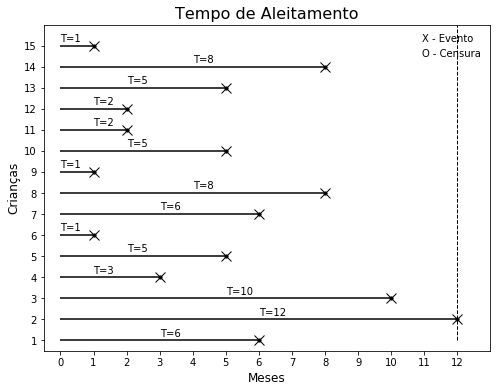

In [49]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
censured = np.ones(15, dtype=np.int)
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Crianças", "Tempo de Aleitamento",
                   8, 6) # Plot size

<a id='E2.1.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.

Indivíduo: 1, Trajetória de Sobrevivência: 6.


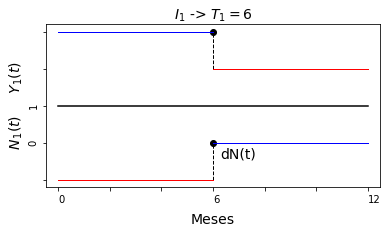

Indivíduo: 2, Trajetória de Sobrevivência: 12.


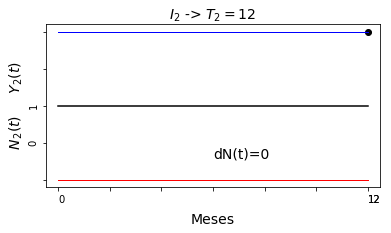

Indivíduo: 3, Trajetória de Sobrevivência: 10.


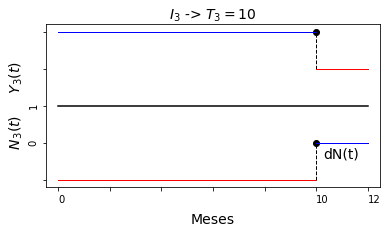

Indivíduo: 4, Trajetória de Sobrevivência: 3.


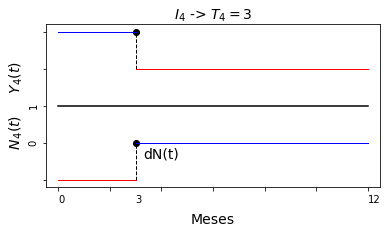

Indivíduo: 5, Trajetória de Sobrevivência: 5.


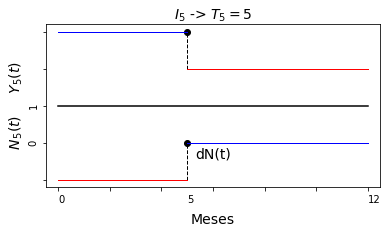

Indivíduo: 6, Trajetória de Sobrevivência: 1.


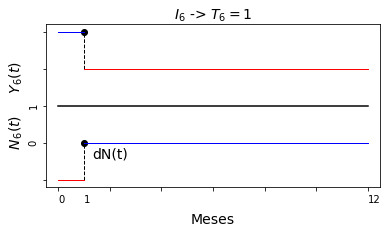

Indivíduo: 7, Trajetória de Sobrevivência: 6.


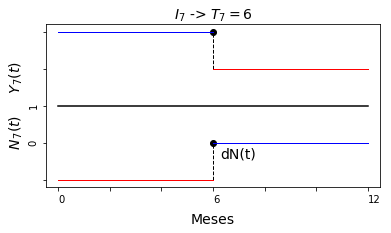

Indivíduo: 8, Trajetória de Sobrevivência: 8.


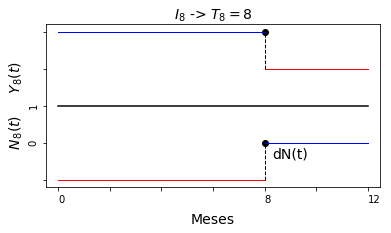

Indivíduo: 9, Trajetória de Sobrevivência: 1.


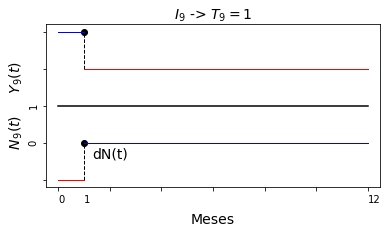

Indivíduo: 10, Trajetória de Sobrevivência: 5.


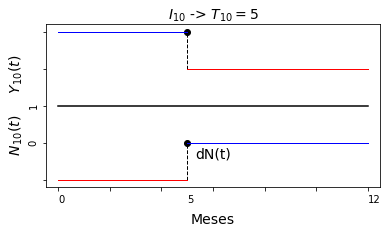

Indivíduo: 11, Trajetória de Sobrevivência: 2.


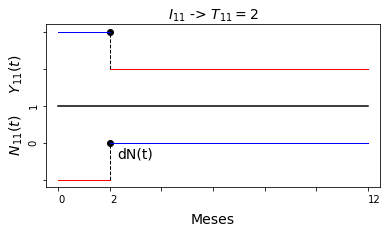

Indivíduo: 12, Trajetória de Sobrevivência: 2.


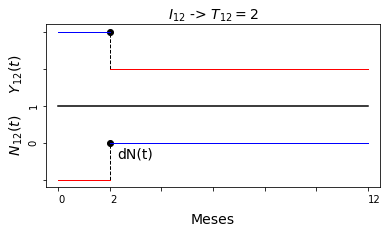

Indivíduo: 13, Trajetória de Sobrevivência: 5.


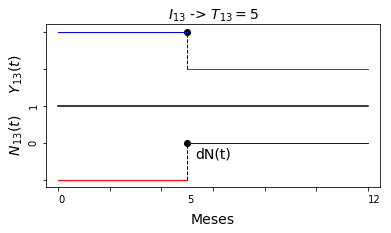

Indivíduo: 14, Trajetória de Sobrevivência: 8.


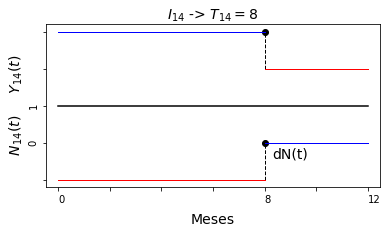

Indivíduo: 15, Trajetória de Sobrevivência: 1.


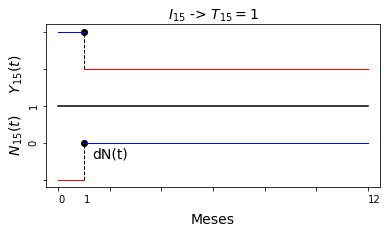

In [50]:
#entry_individual = np.zeros(15, dtype=np.int)
#actual_lifetimes = np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1])
#censured = np.ones(15, dtype=np.int)

# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")


<a id='E2.1.c'></a>
#### c) Como você construiria um banco de dados para analisar estes dados pelo processo clássico?

In [51]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo,Status
0,1,6,1
1,2,12,1
2,3,10,1
3,4,3,1
4,5,5,1
5,6,1,1
6,7,6,1
7,8,8,1
8,9,1,1
9,10,5,1


<a id='E2.1.a'></a>
#### d)E pelo processo de contagem?

In [52]:
df = pd.DataFrame(np.array([6,12,10,3,5,1,6,8,1,5,2,2,5,8,1]))
df['Tempo Inicial'] = 0
df = df[['Tempo Inicial', 0]]
df = df.reset_index()
df = df.rename(columns={0: 'Tempo Final', 'index':'Criança'})
df['Status'] = 1
df['Criança'] = df['Criança'] + 1
df

,Criança,Tempo Inicial,Tempo Final,Status
0,1,0,6,1
1,2,0,12,1
2,3,0,10,1
3,4,0,3,1
4,5,0,5,1
5,6,0,1,1
6,7,0,6,1
7,8,0,8,1
8,9,0,1,1
9,10,0,5,1


## Exercício 2.2  <a id='Exercicio2.2'></a>

Considere agora o tempo de sobrevivência de 15 pacientes submetidos à hemodiálise. Neste caso, a variável de interesse  é  o  tempo  desde  a  primeira diálise até o óbito (em meses).

2, 4, 29+, 6+, 3, 1, 1, 2, 3, 9+, 10, 11, 5+, 5, 1

Os tempos censurados (censura a direita) estão indicados pelo sinal de +.

Considere  que todos os pacientes entraram juntos no início do estudo.

* [**a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.**](#E2.2.a)
* [**b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.**](#E2.2.b)
* [**c) Construa um banco de dados para analisar esses dados pelo processo clássico.**](#E2.2.c)
* [**d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo**](#E2.2.d)

[Topo](#topo)

<a id='E2.2.a'></a>
#### a) Represente graficamente os tempos de observação dos pacientes, utilizando a notação clássica.

Tempo de vida observado: 
 [ 2  4 29  6  3  1  1  2  3  9 10 11  5  5  1] 



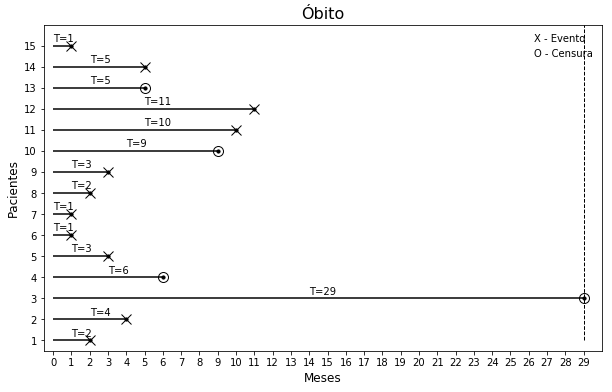

In [170]:
# Dados de sobrevivência
entry_individual = np.zeros(15, dtype=np.int)
actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
current_time = max(actual_lifetimes + entry_individual) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Óbito",
                   10, 6) # Plot size

<a id='E2.2.b'></a>
#### b) Represente as trajetórias dos primeiros cinco indivíduos utilizando as variáveis N(t) e Y (t) do processo de contagem.

Indivíduo: 1, Trajetória de Sobrevivência: 2.


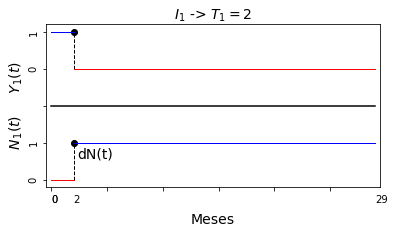

Indivíduo: 2, Trajetória de Sobrevivência: 4.


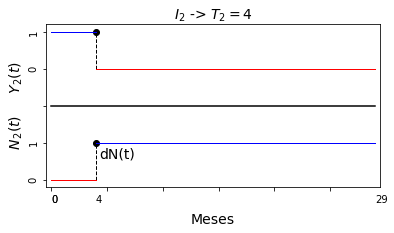

Indivíduo: 3, Trajetória de Sobrevivência: 29.


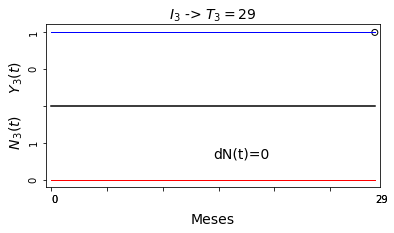

Indivíduo: 4, Trajetória de Sobrevivência: 6.


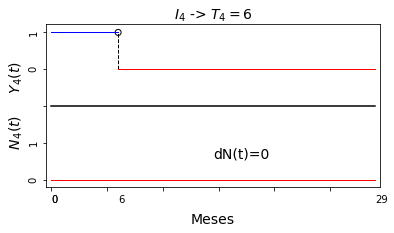

Indivíduo: 5, Trajetória de Sobrevivência: 3.


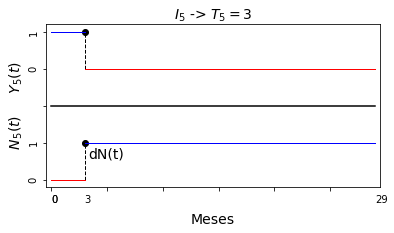

Indivíduo: 6, Trajetória de Sobrevivência: 1.


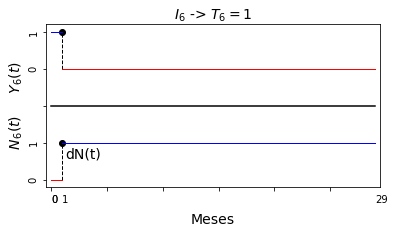

Indivíduo: 7, Trajetória de Sobrevivência: 1.


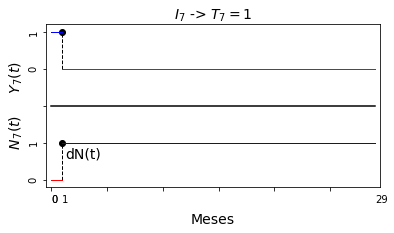

Indivíduo: 8, Trajetória de Sobrevivência: 2.


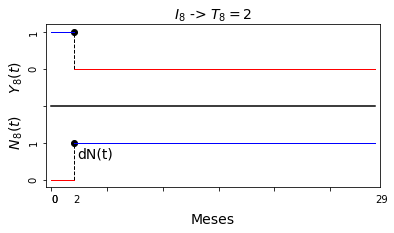

Indivíduo: 9, Trajetória de Sobrevivência: 3.


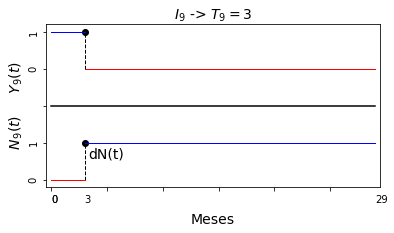

Indivíduo: 10, Trajetória de Sobrevivência: 9.


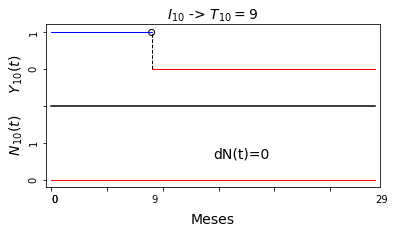

Indivíduo: 11, Trajetória de Sobrevivência: 10.


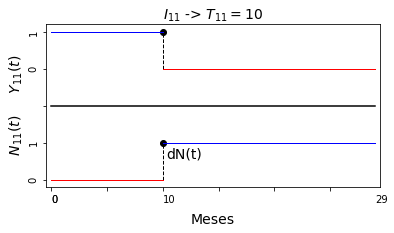

Indivíduo: 12, Trajetória de Sobrevivência: 11.


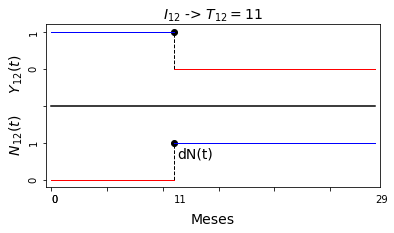

Indivíduo: 13, Trajetória de Sobrevivência: 5.


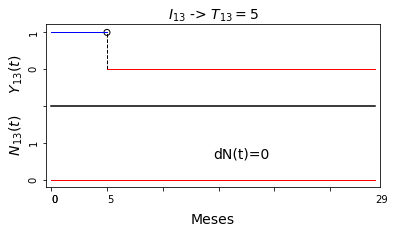

Indivíduo: 14, Trajetória de Sobrevivência: 5.


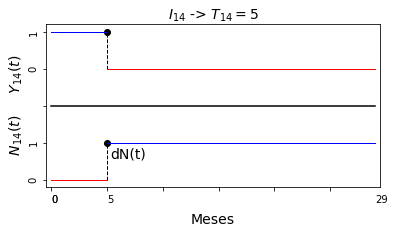

Indivíduo: 15, Trajetória de Sobrevivência: 1.


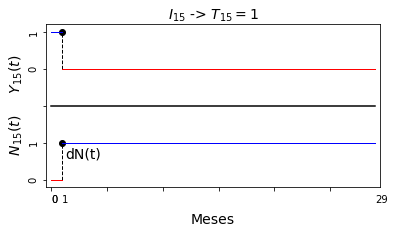

In [171]:
#entry_individual = np.zeros(15, dtype=np.int)
#actual_lifetimes = np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1])
#censured = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])

# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

<a id='E2.2.c'></a>
#### c) Construa um banco de dados para analisar esses dados pelo processo clássico.

In [55]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df['Paciente'] = df['Paciente'] + 1
df

,Paciente,Tempo,Status
0,1,2,1
1,2,4,1
2,3,29,0
3,4,6,0
4,5,3,1
5,6,1,1
6,7,1,1
7,8,2,1
8,9,3,1
9,10,9,0


<a id='E2.2.d'></a>
#### d) Reconstrua o banco de dados, na formas de processo de contagem, considerando que esta  é  uma  coorte  aberta  e  as  datas  de  início  de  observação  de  cada  paciente  são dadas na tabela abaixo.

In [56]:
df = pd.DataFrame(np.array([2, 4, 29, 6, 3, 1, 1, 2, 3, 9, 10, 11, 5, 5, 1]))
df['Tempo Inicial'] = np.array([0, 1, 12, 3, 1, 7, 0, 1, 1, 3, 12, 4, 4, 1, 22])
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Paciente'})
df['Paciente'] = df['Paciente'] + 1
df['Tempo Final'] = df['Tempo Inicial'] + df['Tempo']
df['Status'] = np.array([1,1,0,0,1,1,1,1,1,0,1,1,0,1,1])
df

,Paciente,Tempo,Tempo Inicial,Tempo Final,Status
0,1,2,0,2,1
1,2,4,1,5,1
2,3,29,12,41,0
3,4,6,3,9,0
4,5,3,1,4,1
5,6,1,7,8,1
6,7,1,0,1,1
7,8,2,1,3,1
8,9,3,1,4,1
9,10,9,3,12,0


## Exercício 2.3  <a id='Exercicio2.3'></a>

Suponha que, em um hospital, 6 pacientes HIV positivo são acompanhados ao longo  de  um  ano.

No  gráfico  abaixo,  as  linhas  horizontais  representam  o  tempo  de acompanhamento  de  cada  paciente. Represente,  utilizando  as variáveis N(t) e Y (t), as trajetórias de cada um dos 6 pacientes.

[Topo](#topo)


Tempo de vida observado: 
 [ 9  6  3 12  6  4] 



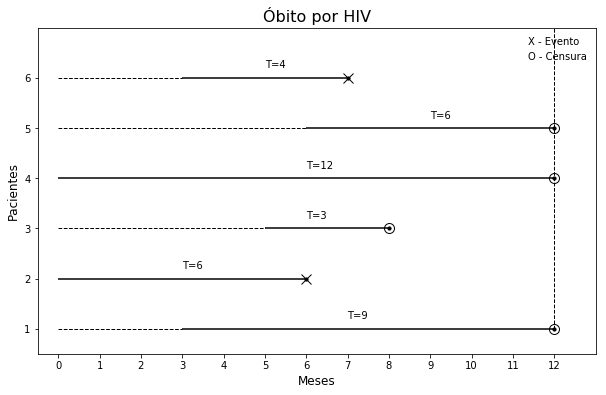

In [168]:
# Dados de sobrevivência
entry_individual = np.array([3,0,5,0,6,3])
actual_lifetimes = np.array([9,6,3,12,6,4])
censured = np.array([0,1,0,0,0,1])
current_time = max(actual_lifetimes) + 1  #This variable defines the time window

# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Óbito por HIV",
                   10, 6) # Plot size

Indivíduo: 1, Trajetória de Sobrevivência: 9.


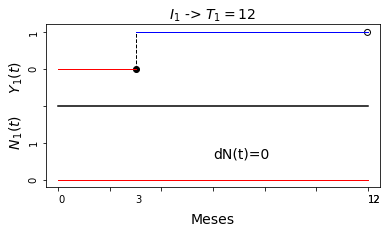

Indivíduo: 2, Trajetória de Sobrevivência: 6.


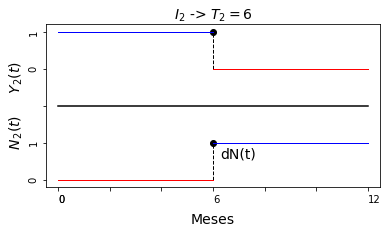

Indivíduo: 3, Trajetória de Sobrevivência: 3.


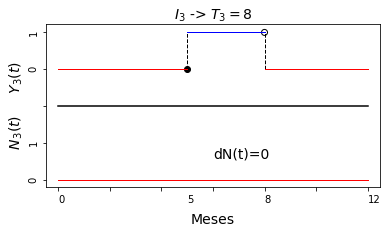

Indivíduo: 4, Trajetória de Sobrevivência: 12.


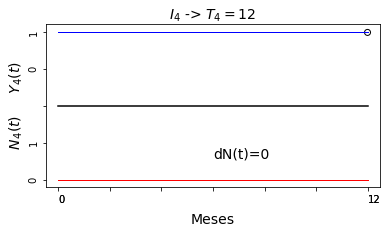

Indivíduo: 5, Trajetória de Sobrevivência: 6.


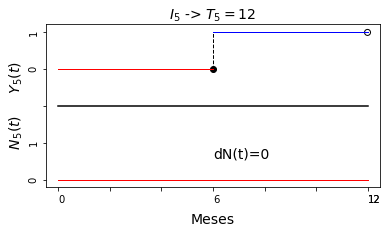

Indivíduo: 6, Trajetória de Sobrevivência: 4.


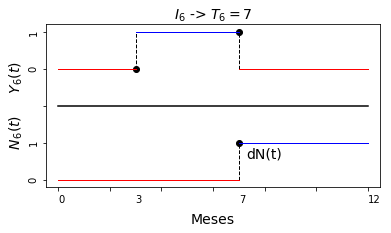

In [169]:
# Plot individual trajectory
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

## Exercício 2.4  <a id='Exercicio2.4'></a>

Um paciente tem a seguinte trajetória de observação, segundo oprocesso de contagem abaixo.

[Topo](#topo)

Indivíduo: 1, Trajetória de Sobrevivência: 2.


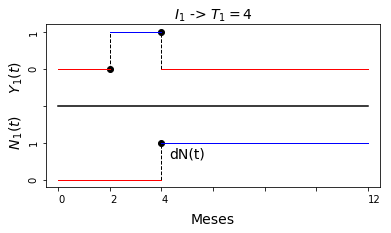

Indivíduo: 2, Trajetória de Sobrevivência: 12.


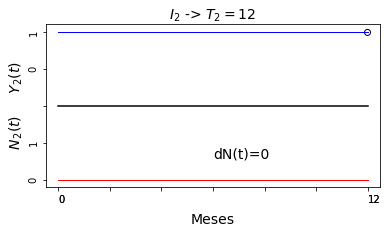

Qual foi o mês de entrada do paciente no estudo? 2
Em que mês ocorreu o desfecho? 4
Quais os meses em que o paciente estava sob risco de óbito? 2 3 4


In [166]:
entry_individual = np.array([2,0])
actual_lifetimes = np.array([2,12])
censured = np.array([1,0])
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

print("Qual foi o mês de entrada do paciente no estudo?", 2)
print("Em que mês ocorreu o desfecho?", 4)
print("Quais os meses em que o paciente estava sob risco de óbito?", 2, 3, 4)

## Exercício 2.5  <a id='Exercicio2.5'></a>

Um paciente tem a seguinte trajetória de observação, segundo oprocesso de contagem abaixo.

[Topo](#topo)

Indivíduo: 1, Trajetória de Sobrevivência: 8.


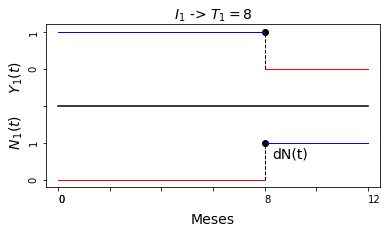

Indivíduo: 2, Trajetória de Sobrevivência: 12.


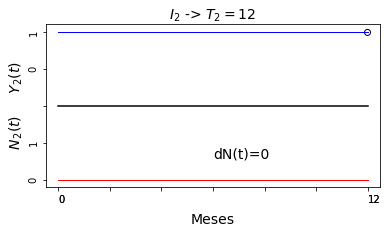

Qual foi o mês de entrada do paciente no estudo? 0
Em que mês ocorreu o desfecho? 8


In [164]:
entry_individual = np.array([0,0])
actual_lifetimes = np.array([8,12])
censured = np.array([1,0])
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

print("Qual foi o mês de entrada do paciente no estudo?", 0)
print("Em que mês ocorreu o desfecho?", 8)

## Exercício 2.6  <a id='Exercicio2.6'></a>

Considere os dados de 6 indivíduos em uma coorte para a avaliação de fatores de  risco  para  a  infecção  por  HIV.

O  estudo  iniciou-se em  01/06/2008  quando  2  indivíduos entraram  no  estudo,  com  resultados  negativos  para  a  infecção.

Um  deles  ao  realizar  o segundo exame, um mês depois, teve resultado positivo, o outro positivou depois de 2 meses.

Os outros 4 indivíduos realizaram seus primeiros exames em 01/07, 01/09, 01/08 e 01/08, e as suas respectivas datas de soroconversões foram 2, 3, 2 e 5 meses, após a entrada.

* [**a) Construa um banco de dados no formato clássico.**](#E2.6.a)
* [**b) Construa um banco de dados em formato de processo de contagem..**](#E2.6.b)
* [**c) Represente graficamente os tempos observados desses indivíduos.**](#E2.6.c)
* [**d) Represente as trajetórias dos seis indivíduos utilizando as variáveis N(t) e Y (t).**](#E2.6.d)

[Topo](#topo)

In [154]:
entry_individual = np.array([0,0,1,3,2,2])
actual_lifetimes = np.array([1,2,2,3,2,5])
censured = np.array([1,1,1,1,1,1])
current_time = max(actual_lifetimes+entry_individual) + 1  #This variable defines the time window


<a id='E2.6.a'></a>
#### **a) Construa um banco de dados no formato clássico.**

In [155]:
df = pd.DataFrame(actual_lifetimes)
df = df.reset_index()
df = df.rename(columns={0: 'Tempo', 'index':'Indivíduo'})
df['Status'] = censured
df['Indivíduo'] = df['Indivíduo'] + 1
df

,Indivíduo,Tempo,Status
0,1,1,1
1,2,2,1
2,3,2,1
3,4,3,1
4,5,2,1
5,6,5,1


<a id='E2.6.b'></a>
#### **b) Construa um banco de dados em formato de processo de contagem..**

In [156]:
df = pd.DataFrame(actual_lifetimes)
df['Início'] = entry_individual
df = df[['Início', 0]]
df = df.reset_index()
df = df.rename(columns={0: 'Fim', 'index':'Indivíduo'})
df['Status'] = censured
df['Indivíduo'] = df['Indivíduo'] + 1
df['Fim'] = df['Fim'] + df['Início']
df

,Indivíduo,Início,Fim,Status
0,1,0,1,1
1,2,0,2,1
2,3,1,3,1
3,4,3,6,1
4,5,2,4,1
5,6,2,7,1


<a id='E2.6.c'></a>
### **c) Represente graficamente os tempos observados desses indivíduos.**

Tempo de vida observado: 
 [1 2 2 3 2 5] 



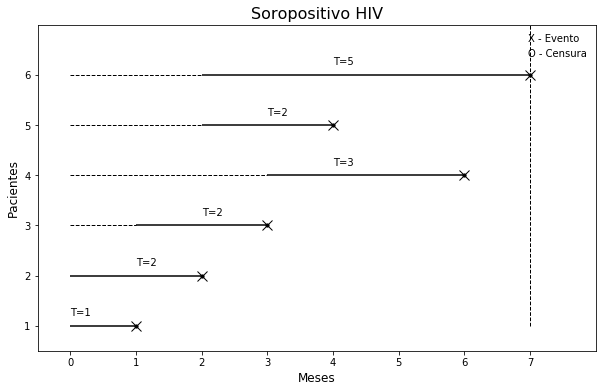

In [158]:
# Plot survival time
survival_time_plot(entry_individual, actual_lifetimes, current_time, censured, 
                   "Meses", "Pacientes", "Soropositivo HIV",
                   10, 6) # Plot size

<a id='E2.6.d'></a>
#### **d) Represente as trajetórias dos seis indivíduos utilizando as variáveis N(t) e Y (t).**

Indivíduo: 1, Trajetória de Sobrevivência: 1.


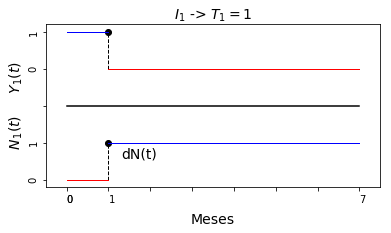

Indivíduo: 2, Trajetória de Sobrevivência: 2.


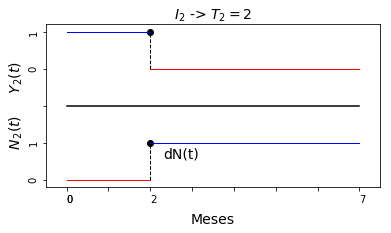

Indivíduo: 3, Trajetória de Sobrevivência: 2.


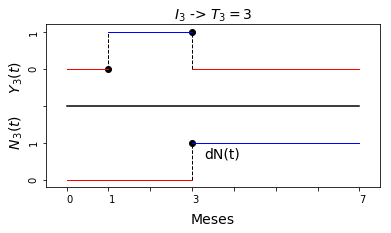

Indivíduo: 4, Trajetória de Sobrevivência: 3.


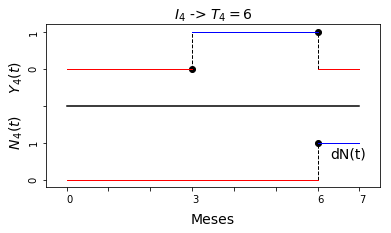

Indivíduo: 5, Trajetória de Sobrevivência: 2.


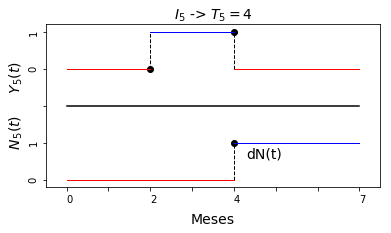

Indivíduo: 6, Trajetória de Sobrevivência: 5.


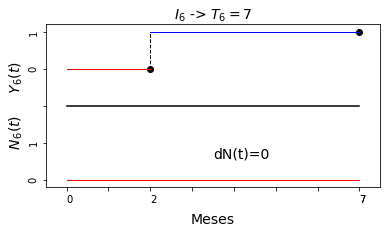

In [161]:
individual_trajectory_plot(entry_individual, actual_lifetimes, censured, "Meses")

e) Quais são os indivíduos em risco no 5º mês do estudo?

**4 e 6**

f) Que tipo de censura ocorreu neste estudo?

**Censura intervalar**

g) Em que situação haveria truncamento?

**Haveria truncamento se fossem incluídos no estudo indivíduos já HIV positivos, ainda vivos no momento do primeiro exame, porque nesse caso outros indivíduos também positivos seriam truncados porque morreram antes do primeiro exame ser feito.**

## Exercício 2.7  <a id='Exercicio2.7'></a>

Para se familiarizar com o banco de dados do IPEC (ipec.csv, veja o Apêndice, seção AIDS – clássico) que será utilizado nos próximos capítulos, inicie a análise de sobrevivência observando os dados dos pacientes.


[Topo](#topo)

In [173]:
df = pd.read_csv('ipec.csv', sep=';').fillna('-1')
df.describe()

,id,ini,fim,tempo,status,idade,acompan,anotrat,tratam,doenca,propcp
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,2396.922280,3335.160622,938.238342,0.466321,36.554404,0.896373,1542.005181,1.098446,37.958549,2.948187
std,55.858452,1216.918778,1501.300776,770.741415,0.500162,9.508680,0.691946,835.230679,0.832696,44.700489,1.603190
min,1.000000,1.000000,96.000000,16.000000,0.000000,20.000000,0.000000,9.000000,0.000000,1.000000,0.000000
25%,49.000000,1406.000000,2095.000000,290.000000,0.000000,30.000000,0.000000,1990.000000,1.000000,3.000000,2.000000
50%,97.000000,2454.000000,3711.000000,852.000000,0.000000,35.000000,1.000000,1993.000000,1.000000,8.000000,4.000000
75%,145.000000,3314.000000,4790.000000,1348.000000,1.000000,43.000000,1.000000,1996.000000,2.000000,99.000000,4.000000
max,193.000000,4593.000000,4822.000000,3228.000000,1.000000,68.000000,2.000000,2000.000000,3.000000,99.000000,4.000000


<a id='surv'></a>
#### Function: surv

In [174]:
df.head()

,id,ini,fim,tempo,status,sexo,escola,idade,risco,acompan,obito,anotrat,tratam,doenca,propcp
0,1,1243,2095,852,1,M,3,34,0,1,S,1991,1,4,3
1,2,2800,2923,123,1,M,2,38,6,1,S,9,0,7,4
2,3,1250,2395,1145,1,M,-1,32,0,1,S,1992,1,3,4
3,4,1915,4670,2755,0,M,-1,43,6,0,N,1992,1,10,4
4,5,2653,4770,2117,0,M,-1,40,0,1,N,1992,1,5,4


In [218]:
# Imprime variável de responsta e devolve em um array
def surv(p_df, p_tempo, p_status):
    result = ""
    temp_list = []
    for index, row in p_df.iterrows():
        value = ("%s" % row[p_tempo]) + ("+" if row[p_status] == 0 else "")
        result = result + "\t" + value
        temp_list.append(value)

    print(result)
    return temp_list
    
myArray = np.array(surv(df, 'tempo', 'status'))

	852	123	1145	2755+	2117+	329+	60	151	1563	1247	84	214	25+	1348	158	555	408	1116	998	1125	944+	54	151	855	116	80+	1757+	194	183	37	237+	1506	168+	134	803+	18	371	173	688	163	3178+	29	50+	887	516	645	310	204	1344+	1261	285	83	150	1307+	1076+	1226	865+	811	2898	80	967	618	235	2236+	152	892	81+	1085	1073+	1615+	35	290	1780+	3228+	52	733	3213+	1983	2304+	572	21	1272+	1646+	304	418	854	2973+	40	850	1139	323	1507+	2717+	1735+	388+	145	905	927	1027+	631	2495+	1331+	623	2568+	2013+	721	1952+	397	254	1630+	1523+	146+	108	1835+	499	333	202+	2437+	1015	2138+	22	2090+	179	2439+	1063+	85+	343+	2215+	259	2258+	1371	39	2371+	975+	952	2492+	1478+	295+	992	1011+	644	426	537+	1454+	1869+	714+	1310+	2084+	1918+	1649+	290+	1685+	1348+	652+	1384+	1471+	1512+	378+	1352+	419	1426+	1488+	1315+	643+	1197+	1343+	1176+	944	340	881+	915+	948+	985+	1242+	955+	987+	899+	1056+	775	785+	731+	16	680+	21+	444+	524+	217+	440+	470+	390+	344+	578+	504+


In [243]:
# Imprime variável de responsta e devolve em um array

def surv(p_df, p_ini, p_fim, p_tempo, p_status):
    tempDf = pd.DataFrame()
    classic_list = []
    count_list = []

    if p_tempo != '':    
        result = ""
        for index, row in p_df.iterrows():
            value = ("%s" % row[p_tempo]) + ("+" if row[p_status] == 0 else "")
            result = result + "\t" + value
            classic_list.append(value)

        tempDf['Classic Process Format'] = np.array(classic_list)

    if p_ini != '':    
        result = ""
        for index, row in p_df.iterrows():
            value = ("(%s,%s" % (row[p_ini],row[p_fim])) + ("+" if row[p_status] == 0 else "") + "]"
            result = result + "\t" + value
            count_list.append(value)

        tempDf['Count Process Format'] = np.array(count_list)

    return tempDf
    
myDf = surv(df, 'ini', 'fim', 'tempo', 'status')
myDf

,Classic Process Format,Count Process Format
0,852,"(1243,2095]"
1,123,"(2800,2923]"
2,1145,"(1250,2395]"
3,2755+,"(1915,4670+]"
4,2117+,"(2653,4770+]"
5,329+,"(3,332+]"
6,60,"(36,96]"
7,151,"(1,152]"
8,1563,"(544,2107]"
9,1247,"(71,1318]"


## Exercício 2.8  <a id='Exercicio2.8'></a>

[Topo](#topo)